In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
train_dir = "C:\\Users\\user\\Desktop\\cry\\test_train-original\\train"
val_dir = "C:\\Users\\user\\Desktop\\cry\\test_train-original\\val"
test_dir = "C:\\Users\\user\\Desktop\\cry\\test_train-original\\test"

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                          # featurewise_center=True,
                                                          # featurewise_std_normalization=True,
#                                                           rotation_range=90,
#                                                           width_shift_range=0.2,
#                                                           height_shift_range=0.2,
#                                                           horizontal_flip=True,
#                                                           zoom_range=0.2,
                                                          )

In [5]:
train_gen = datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                        shuffle=True,
                                                 class_mode = 'categorical')
test_gen= datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=False,
                                            class_mode ='categorical')
val_gen = datagen.flow_from_directory(val_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=True,
                                          class_mode = 'categorical')

Found 4077 images belonging to 20 classes.
Found 526 images belonging to 20 classes.
Found 502 images belonging to 20 classes.


In [6]:
# Visualizing data
import os 
def visualize_random_images(dataset_type="train", label_type="Downy mildew(120)"):
    
    sample = 9
    
    plt.figure(figsize=(15, 8))
    type_dir = train_dir if dataset_type=="train" else test_dir
    base_dir = os.path.join(type_dir, label_type)
    images = random.sample(os.listdir(base_dir), 9)
    
    for i, image in enumerate(images):
        plt.subplot(3, 3, i+1)
        img = plt.imread(os.path.join(base_dir, image))
        plt.imshow(img)

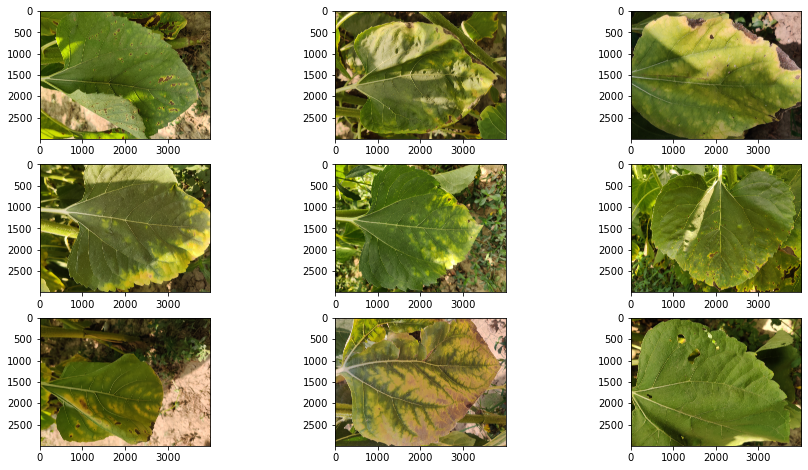

In [7]:
visualize_random_images("/content/test_train-original/train/Downy mildew(120)/downymildew.  (10).jpg")

In [8]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [9]:
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [10]:

# model=Sequential()


# model.add(Conv2D(32, (3, 3) ,activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(2, padding='same'))


# model.add(Conv2D(64, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())


# model.add(Conv2D(128, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(512, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Flatten())

# model.add(Dense(1024 , activation='relu'))
# model.add(layers.Dropout(.2))
# model.add(Dense(1024, activation='relu'))


# model.add(Dense(20, activation='softmax'))


In [11]:
# base_model = tf.keras.applications.mobilenet.MobileNet(include_top=False)
# base_model.trainable = False

# for layer in base_model.layers[:-5]:
#   layer.trainable = False

# inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
# base_layer = base_model(inputs)

# flat_layer = layers.Flatten()(base_layer)

# outputs = layers.Dense(20, activation="softmax")(flat_layer)
# model = Model(inputs, outputs)

In [12]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
base_model.trainable = False

for layer in base_model.layers[:-5]:
  layer.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
base_layer = base_model(inputs)

flat_layer = layers.Flatten()(base_layer)

outputs = layers.Dense(20, activation="softmax")(flat_layer)
model = Model(inputs, outputs)

94781440/94765736 [==============================] - 20s 0us/step


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_gen,
                       epochs=40,
                       validation_data=val_gen)

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
128/128 [==============================] - 220s 2s/step - loss: 7.3334 - accuracy: 0.6885 - val_loss: 4.0036 - val_accuracy: 0.8207
Epoch 2/40
128/128 [==============================] - 209s 2s/step - loss: 1.1187 - accuracy: 0.9397 - val_loss: 3.5220 - val_accuracy: 0.8386
Epoch 3/40
128/128 [==============================] - 208s 2s/step - loss: 0.4865 - accuracy: 0.9671 - val_loss: 6.4445 - val_accuracy: 0.8127
Epoch 4/40
128/128 [==============================] - 209s 2s/step - loss: 0.4202 - accuracy: 0.9760 - val_loss: 4.0738 - val_accuracy: 0.8586
Epoch 5/40
128/128 [==============================] - 211s 2s/step - loss: 0.2967 - accuracy: 0.9782 - val_loss: 5.4746 - val_accuracy: 0.8327
Epoch 6/40
128/128 [==============================] - 209s 2s/step - loss: 0.2109 - accuracy: 0.9836 - val_loss: 4.3650 - val_accuracy: 0.8546
Epoch 7/40
128/128 [==============================] - 210s 2s/step - loss: 0.2331 - accuracy: 0.9818 - val_loss: 4.8067 - val_accuracy: 0.8466

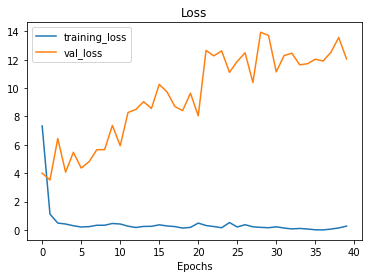

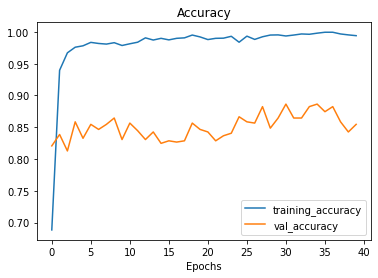

In [14]:
plot_loss_curves(history)

In [15]:
model.evaluate(test_gen)

17/17 [==============================] - 27s 2s/step - loss: 16.8975 - accuracy: 0.8327


[16.897483825683594, 0.8326995968818665]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from keras.utils.np_utils import to_categorical
import numpy as np
print("==============TEST RESULTS============")

num_classes = len(train_gen.class_indices)
test_labels = test_gen.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_gen, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_gen.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

# print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))

==============TEST RESULTS============
17/17 [==============================] - 28s 2s/step
                                     precision    recall  f1-score   support

               Apple Aphis spp(162)       0.93      0.76      0.84        17
      Apple Eriosoma lanigerum(366)       1.00      0.82      0.90        38
           Apple Monillia laxa(255)       0.52      0.85      0.65        26
     Apple Venturia inaequalis(633)       0.78      0.84      0.81        64
Apricot Coryneum beijerinckii(1101)       0.94      0.93      0.93       111
          Apricot Monillia laxa(85)       1.00      0.56      0.71         9
                 Cancer symptom(76)       0.50      1.00      0.67         9
              Cherry Aphis spp(356)       0.94      0.92      0.93        37
                  Downy mildew(120)       0.67      0.17      0.27        12
                Drying symptom(156)       1.00      1.00      1.00        15
                      Gray mold(72)       1.00      0.75    

<AxesSubplot:>

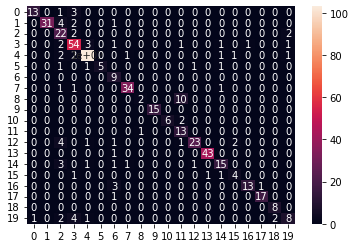

In [17]:
sns.heatmap(confusion_mtx.astype("int"), annot=True)